In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy as sc
%matplotlib inline
from collections import Counter
import random

Берем выборку в 1000 элементов с распределением Пуассона при $\lambda$ = 3. Проверяем математическое ожидание, медиану и моду.

In [50]:
mu = 3
poisson_rv = sts.poisson(mu)
y = poisson_rv.rvs(1000)
print("Мат ожидание выборки = ", np.mean(y))
print("Медиана выборки = ", np.median(y))
print("Мода выборки = ", sts.mode(y).mode[0])

Мат ожидание выборки =  3.029
Медиана выборки =  3.0
Мода выборки =  2


Дальше строим гистограмму плотности нашей выборки и теоритический график плотности с нормальным распределением. Т.к. при распределении Пуассона $\mu$ = $\lambda$ и D = $\lambda$, то гаусиана имеет параметры ($\lambda$, sqrt($\lambda$)).

Text(0,0.5,'f(x)')

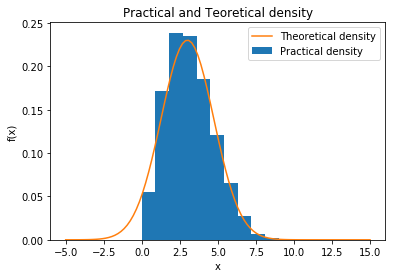

In [54]:
plt.hist(y, density=True, label='Practical density')

x = np.linspace(-5, 15, 100)
norm_rv = sts.norm(mu, sc.sqrt(mu))

plt.plot(x, norm_rv.pdf(x), label='Theoretical density')

plt.legend()
plt.title('Practical and Teoretical density')
plt.xlabel('x')
plt.ylabel('f(x)')

Дальше строим графики плотности и теоритической плотности с для средних и выборки из 5, 10 и 50 элементов. Если центральная предельная теорема верна, то апрксимировать гистограмму плотности мы сможем нормальным распределением с параметрми  $\mu$ = $\lambda$ и $\sigma$ = sqrt($\lambda$ / n)

Text(0,0.5,'f(x)')

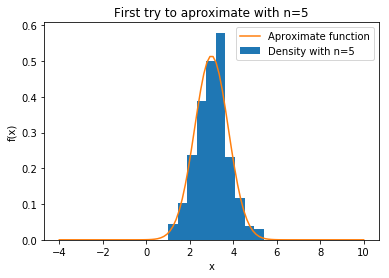

In [70]:
#Задаем количество элементов выборки
n = 5

#Формируем вектор средних
base_vector = np.array([])
for i in range(1000):
    average = sum(random.choices(y, k=n)) / n
    base_vector = np.append(base_vector, average)
    
#Отрисовываем гистограмму плотности вектора средних
plt.hist(base_vector, density=True, label='Density with n=5')

#Теперь отрисовывем гаусиану с параметрами (mu, sqrt(mu/n))
x = np.linspace(-4, 10, 100)
norm_rv = sts.norm(mu, sc.sqrt(mu/n))
plt.plot(x, norm_rv.pdf(x), label='Aproximate function')

plt.legend()
plt.title('First try to aproximate with n=5')
plt.xlabel('x')
plt.ylabel('f(x)')

Как видим из графика выше, уже даже при n=5, гистограмма очень напоминает апроксифирующую фукнцию.

Пойдем дальше и попробуем тут же код при n = 10!

Text(0,0.5,'f(x)')

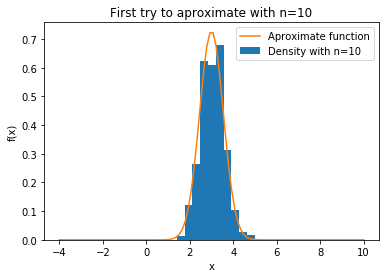

In [73]:
#Задаем количество элементов выборки
n = 10

#Формируем вектор средних
base_vector = np.array([])
for i in range(1000):
    average = sum(random.choices(y, k=n)) / n
    base_vector = np.append(base_vector, average)
    
#Отрисовываем гистограмму плотности вектора средних
plt.hist(base_vector, density=True, label='Density with n=10')

#Теперь отрисовывем гаусиану с параметрами (mu, sqrt(mu/n))
x = np.linspace(-4, 10, 100)
norm_rv = sts.norm(mu, sc.sqrt(mu/n))
plt.plot(x, norm_rv.pdf(x), label='Aproximate function')

plt.legend()
plt.title('First try to aproximate with n=10')
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
При n=10 результат гистограмма более точно описывает апроксимирующую кривую нормального распределения.

Теперь попробуем n=50

Text(0,0.5,'f(x)')

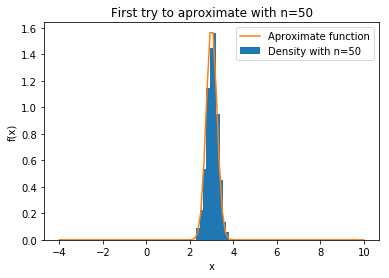

In [83]:
#Задаем количество элементов выборки
n = 50

#Формируем вектор средних
base_vector = np.array([])
for i in range(1000):
    average = sum(random.choices(y, k=n)) / n
    base_vector = np.append(base_vector, average)
    
#Отрисовываем гистограмму плотности вектора средних
plt.hist(base_vector, density=True, label='Density with n=50')

#Теперь отрисовывем гаусиану с параметрами (mu, sqrt(mu/n))
x = np.linspace(-4, 10, 100)
norm_rv = sts.norm(mu, sc.sqrt(mu/n))
plt.plot(x, norm_rv.pdf(x), label='Aproximate function')

plt.legend()
plt.title('First try to aproximate with n=50')
plt.xlabel('x')
plt.ylabel('f(x)')

При n = 50 гистограмма плотности наиболее приближена к апроксимирующей кривой!

Вывод: Центральная предельная теорема работает и мы можем любую фунцию распределения приблизить нормальная распределением и параметрами:
        $\mu$ - мат ожидаин функции плотности заданого распределения
        $\sigma$ = sqrt(D / n), где n -  количество элементов в выборке для нахождения среднего значения.